In [2]:
import numpy as np
import pandas as pd

sales_flow_data = pd.read_excel('附件2.xlsx')
sales_flow_data

,销售日期,扫码销售时间,单品编码,销量(千克),销售单价(元/千克),销售类型,是否打折销售
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,销售,否
1,2020-07-01,09:17:27.295,102900005115960,0.849,3.2,销售,否
2,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,销售,否
3,2020-07-01,09:19:45.450,102900005115823,0.421,10.0,销售,否
4,2020-07-01,09:20:23.686,102900005115908,0.539,8.0,销售,否
...,...,...,...,...,...,...,...
878498,2023-06-30,21:35:13.264,102900005115250,0.284,24.0,销售,否
878499,2023-06-30,21:35:14.358,102900011022764,0.669,12.0,销售,否
878500,2023-06-30,21:35:20.264,102900005115250,0.125,24.0,销售,否
878501,2023-06-30,21:35:21.509,102900011016701,0.252,5.2,销售,否


In [44]:
product_info = pd.read_excel('附件1.xlsx')
sales_flow_data = sales_flow_data[sales_flow_data['销售类型'] == '销售']
sales_flow_data_sumbyquantity = sales_flow_data.groupby('单品编码')['销量(千克)'].sum()
df = pd.merge(product_info,sales_flow_data_sumbyquantity,on= '单品编码')

sum_by_product = df.drop(['单品编码','分类编码'], axis=1)
sum_by_category = sum_by_product.drop('单品名称', axis=1).groupby('分类名称')['销量(千克)'].sum().to_frame()
sum_by_category.reset_index(inplace=True)


sum_by_product, sum_by_category

(           单品名称 分类名称    销量(千克)
 0          牛首生菜  花叶类   899.837
 1         四川红香椿  花叶类   333.485
 2        本地小毛白菜  花叶类   121.020
 3           白菜苔  花叶类   718.676
 4            苋菜  花叶类  5102.658
 ..          ...  ...       ...
 241   海鲜菇(袋)(4)  食用菌  2150.000
 242      海鲜菇(包)  食用菌  1303.000
 243   海鲜菇(袋)(3)  食用菌  1776.000
 244   虫草花(盒)(2)  食用菌     1.000
 245  和丰阳光海鲜菇(包)  食用菌   109.000
 
 [246 rows x 3 columns],
     分类名称      销量(千克)
 0  水生根茎类   40607.552
 1    花叶类  198659.553
 2    花菜类   41789.777
 3     茄类   22442.119
 4    辣椒类   91645.112
 5    食用菌   76131.726)

In [13]:
# 查询当前系统所有字体
from matplotlib.font_manager import FontManager
import subprocess

mpl_fonts = set(f.name for f in FontManager().ttflist)

print('all font list get from matplotlib.font_manager:')
for f in sorted(mpl_fonts):
    print('\t' + f)

all font list get from matplotlib.font_manager:
	Agency FB
	Algerian
	Arial
	Arial Rounded MT Bold
	Bahnschrift
	Baskerville Old Face
	Bauhaus 93
	Bell MT
	Berlin Sans FB
	Berlin Sans FB Demi
	Bernard MT Condensed
	Blackadder ITC
	Bodoni MT
	Book Antiqua
	Bookman Old Style
	Bookshelf Symbol 7
	Bradley Hand ITC
	Britannic Bold
	Broadway
	Brush Script MT
	Calibri
	Californian FB
	Calisto MT
	Cambria
	Candara
	Castellar
	Centaur
	Century
	Century Gothic
	Century Schoolbook
	Chiller
	Colonna MT
	Comic Sans MS
	Consolas
	Constantia
	Cooper Black
	Copperplate Gothic Bold
	Copperplate Gothic Light
	Corbel
	Courier New
	Curlz MT
	DejaVu Math TeX Gyre
	DejaVu Sans
	DejaVu Sans Display
	DejaVu Sans Mono
	DejaVu Serif
	DejaVu Serif Display
	DengXian
	Dubai
	Ebrima
	Edwardian Script ITC
	Elephant
	Engravers MT
	Eras Bold ITC
	Eras Demi ITC
	Eras Light ITC
	Eras Medium ITC
	FZShuTi
	FZYaoTi
	FangSong
	Felix Titling
	Fences
	Footlight MT Light
	Forte
	Franklin Gothic Book
	Franklin Gothic Demi
	Fran

In [35]:
with pd.ExcelWriter('问题一.xlsx') as writer:
    sum_by_product.to_excel(writer, sheet_name='单品销量', index= False)
    sum_by_category.to_excel(writer, sheet_name='品类销量', index= False)


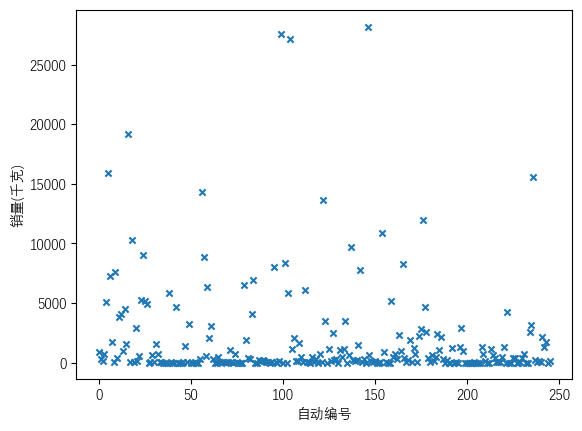

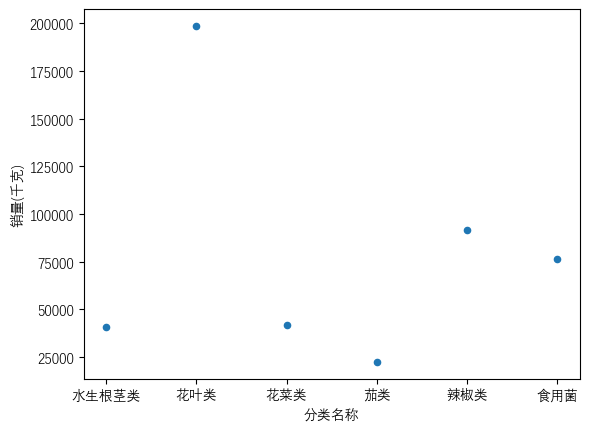

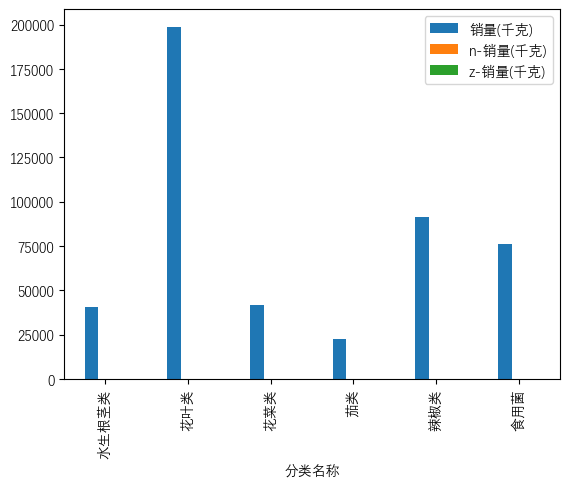

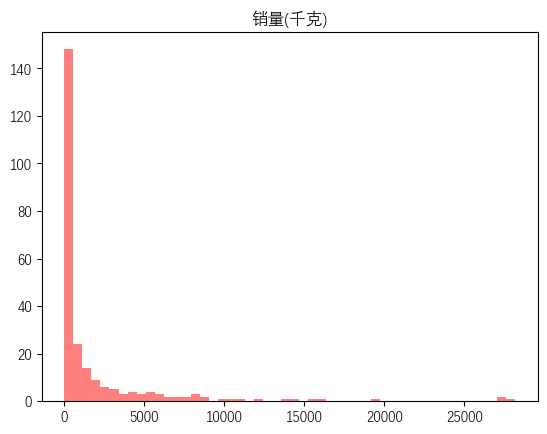

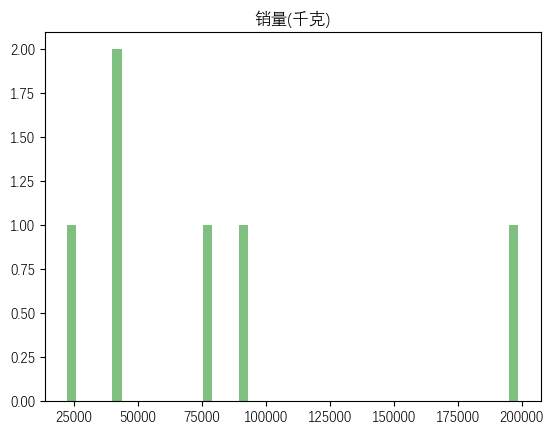

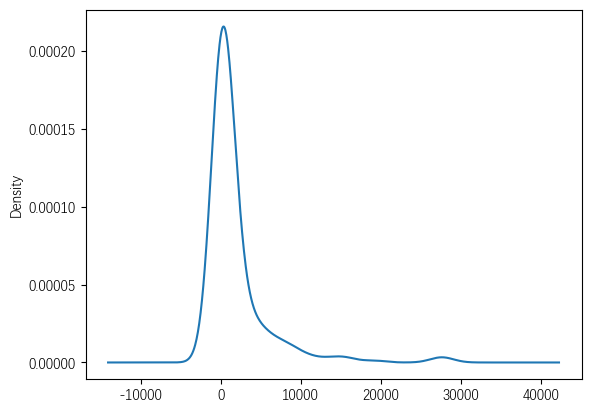

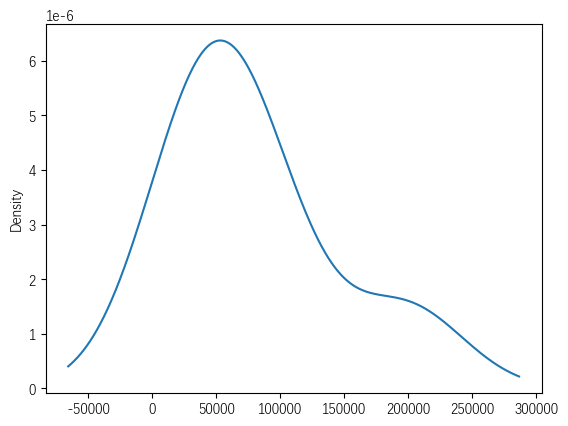

,销量均值,销量方差,销量谷值,销量峰值
单品,1915.755443,4202.571744,0.415,28181.741
各品类,78545.973167,64097.850662,22442.119,198659.553


In [41]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
matplotlib.rc("font",family='DengXian')
plt.rcParams['axes.unicode_minus'] = False

#2020 年 7 月 1 日至 2023 年 6 月 30 日单品销售总量散点图
sum_by_product = sum_by_product
sum_by_product['自动编号'] = [i for i in range(len(sum_by_product))] 
sum_by_product.plot.scatter(x='自动编号', y='销量(千克)',marker= 'x')
plt.show()

#2020 年 7 月 1 日至 2023 年 6 月 30 日各品类销售总量散点图和柱状图
sum_by_category.plot.scatter(x='分类名称', y='销量(千克)')
sum_by_category.plot(kind= 'bar',x='分类名称')
plt.show()

#单品销量(标准化)
product_min = sum_by_product['销量(千克)'].min()
product_max = sum_by_product['销量(千克)'].max()
product_normal = (sum_by_product['销量(千克)']-product_min)/(product_max-product_min)

product_mean=sum_by_product['销量(千克)'].mean()
product_std=sum_by_product['销量(千克)'].std()
product_znormal=(sum_by_product['销量(千克)']-product_mean)/product_std

#各品类销售量(标准化)
category_min = sum_by_category['销量(千克)'].min()
category_max = sum_by_category['销量(千克)'].max()
category_normal = (sum_by_category['销量(千克)']-category_min)/(category_max-category_min)

category_mean=sum_by_category['销量(千克)'].mean()
category_std=sum_by_category['销量(千克)'].std()
category_znormal=(sum_by_category['销量(千克)']-category_mean)/category_std


#2020 年 7 月 1 日至 2023 年 6 月 30 日单品销售总量直方图
sum_by_product['n-销量(千克)'] = product_normal
sum_by_product['z-销量(千克)'] = product_znormal
# sum_by_product.hist(color= 'r',column='n-销量(千克)', grid= False, bins=50, alpha = 0.5)
# sum_by_product.hist(color= 'r',column='z-销量(千克)', grid= False, bins=50, alpha = 0.5)
sum_by_product.hist(color= 'r',column='销量(千克)', grid= False, bins=50, alpha = 0.5)
plt.show()

#2020 年 7 月 1 日至 2023 年 6 月 30 日各品类销售总量直方图
sum_by_category['n-销量(千克)'] = category_normal
sum_by_category['z-销量(千克)'] = category_znormal
# sum_by_category.hist(color= 'g',column='n-销量(千克)', grid= False, bins=50, alpha = 0.5)
# sum_by_category.hist(color= 'g',column='z-销量(千克)', grid= False, bins=50, alpha = 0.5)
sum_by_category.hist(color= 'g',column='销量(千克)', grid= False, bins=50, alpha = 0.5)
plt.show()

#2020 年 7 月 1 日至 2023 年 6 月 30 日单品销售总量密度图
sum_by_product['销量(千克)'].plot.kde()
plt.show()

#2020 年 7 月 1 日至 2023 年 6 月 30 日各品类销售总量密度图
sum_by_category['销量(千克)'].plot.kde()
plt.show()


data = pd.DataFrame([[product_mean, product_std, product_min, product_max], 
                     [category_mean, category_std, category_min, category_max]],columns=['销量均值','销量方差','销量谷值','销量峰值'], index=['单品','各品类'])
data